<a href="https://colab.research.google.com/github/Riju0045/ISI-codes/blob/main/ISI_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv('orders_export_1 (45)(in).csv')
df


/tmp/ipython-input-5-2541503013.py:2: DtypeWarning: Columns (65) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('orders_export_1 (45)(in).csv')  # Replace with your filename


,Name,Created at,Currency,Subtotal,Shipping,Taxes,Total,Discount Code,Discount Amount,Shipping Method,...,Tax 5 Value,Phone,Receipt Number,Duties,Billing Province Name,Shipping Province Name,Payment ID,Payment Terms Name,Next Payment Due At,Payment References
0,#19174,2025-06-19 14:37:49 +0530,INR,486.0,0.0,74.13,486.0,POPSHOP_935a40-100-8240225860,100.0,Free,...,NaN,NaN,NaN,NaN,West Bengal,West Bengal,r5BD9jco3634FldYFBdeXKUzN,NaN,NaN,r5BD9jco3634FldYFBdeXKUzN
1,#19174,2025-06-19 14:37:49 +0530,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,#19174,2025-06-19 14:37:49 +0530,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,#19174,2025-06-19 14:37:49 +0530,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,#19173,2025-06-19 14:23:08 +0530,INR,527.0,0.0,25.10,527.0,POPSHOP_d7bd55-38-9073993077,38.0,Free,...,NaN,NaN,NaN,NaN,West Bengal,West Bengal,rgPtlvkRRXbEp3hTltzXKNfeF,NaN,NaN,rgPtlvkRRXbEp3hTltzXKNfeF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31601,#1005,2022-06-22 11:47:06 +0530,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,9.200000e+11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31602,#1005,2022-06-22 11:47:06 +0530,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,9.200000e+11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31603,#1004,2022-06-17 13:53:12 +0530,INR,260.0,0.0,39.66,260.0,NaN,0.0,Free Shipping (Cash on Delivery),...,NaN,NaN,NaN,NaN,West Bengal,West Bengal,pb0obOsZKqzw_yo0B-wCx3HR,NaN,NaN,pb0obOsZKqzw_yo0B-wCx3HR
31604,#1003,2022-06-10 17:45:10 +0530,INR,20.0,0.0,3.05,20.0,NaN,0.0,Standard,...,NaN,NaN,NaN,NaN,West Bengal,West Bengal,c23337559294123.1 + c23337559294123.2,NaN,NaN,c23337559294123.1 + c23337559294123.2


In [ ]:

df['Billing street'].fillna(df.groupby('Name')['Billing street'].transform('first'), inplace=True)
df['Billing Address 1'].fillna(df.groupby('Name')['Billing Address 1'].transform('first'), inplace=True)
df['Billing address 2'].fillna(df.groupby('Name')['Billing address 2'].transform('first'), inplace=True)
df['Billing City'].fillna(df.groupby('Name')['Billing City'].transform('first'), inplace=True)
df['Billing Zip'].fillna(df.groupby('Name')['Billing Zip'].transform('first'), inplace=True)
df['Billing Province'].fillna(df.groupby('Name')['Billing Province'].transform('first'), inplace=True)
df['Billing Country'].fillna(df.groupby('Name')['Billing Country'].transform('first'), inplace=True)
df['Shipping name'].fillna(df.groupby('Name')['Shipping name'].transform('first'), inplace=True)
df['Shipping Address'].fillna(df.groupby('Name')['Shipping Address'].transform('first'), inplace=True)
df['Shipping Address 1'].fillna(df.groupby('Name')['Shipping Address 1'].transform('first'), inplace=True)
df['Shipping City'].fillna(df.groupby('Name')['Shipping City'].transform('first'), inplace=True)
#df['Shipping City'].fillna(df.groupby('Name')['Shipping '].transform('first'), inplace=True)
df['Shipping Zip'].fillna(df.groupby('Name')['Shipping Zip'].transform('first'), inplace=True)
df['Shipping Province'].fillna(df.groupby('Name')['Shipping Province'].transform('first'), inplace=True)
df['Shipping Country'].fillna(df.groupby('Name')['Shipping Country'].transform('first'), inplace=True)


df

/tmp/ipython-input-11-1723946225.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Billing street'].fillna(df.groupby('Name')['Billing street'].transform('first'), inplace=True)
/tmp/ipython-input-11-1723946225.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

,Created at,Currency,Shipping Method,Lineitem quantity,Lineitem name,Lineitem price,Lineitem compare at price,Lineitem taxable,Lineitem fulfillment status,Billing name,...,Tax 1 Value,Tax 2 Name,Tax 2 Value,Tax 3 Name,Tax 3 Value2,Billing Province Name,Shipping Province Name,Name,Unnamed: 41,Unnamed: 42
0,2025-06-19 14:37:49 +0530,INR,Free,1,Parle Agro Dhishoom Jeera Masala Flavoured Sod...,10.0,103.0,True,pending,Anneysha Mukherjee,...,74.1321,NaN,NaN,NaN,NaN,West Bengal,West Bengal,#19174,NaN,NaN
1,2025-06-19 14:37:49 +0530,INR,Free,1,Bailley Water - 250ml (Pack of 24),144.0,168.0,True,pending,Anneysha Mukherjee,...,NaN,NaN,NaN,NaN,NaN,West Bengal,West Bengal,#19174,NaN,NaN
2,2025-06-19 14:37:49 +0530,INR,Free,1,Keventer Metro Choco Chips Cup Ice Cream - 80m...,216.0,240.0,True,pending,Anneysha Mukherjee,...,NaN,NaN,NaN,NaN,NaN,West Bengal,West Bengal,#19174,NaN,NaN
3,2025-06-19 14:37:49 +0530,INR,Free,1,Keventer Metro Nolen Gur Cup Ice Cream - 80ml ...,216.0,240.0,True,pending,Anneysha Mukherjee,...,NaN,NaN,NaN,NaN,NaN,West Bengal,West Bengal,#19174,NaN,NaN
4,2025-06-19 14:23:08 +0530,INR,Free,2,Keventer Malai Paneer Cubes - 200 gms,95.0,110.0,True,pending,Namrata Mukherjee,...,25.1000,NaN,NaN,NaN,NaN,West Bengal,West Bengal,#19173,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31601,2022-06-22 11:47:06 +0530,INR,Standard,1,Keventer UHT Toned Milk - 1 Ltr,70.0,NaN,True,fulfilled,Nupur Roy,...,NaN,NaN,NaN,NaN,NaN,West Bengal,West Bengal,#1005,NaN,9.200000e+11
31602,2022-06-22 11:47:06 +0530,INR,Standard,2,Keventer Chocolate Milkshake - 150 ml,20.0,NaN,True,fulfilled,Nupur Roy,...,NaN,NaN,NaN,NaN,NaN,West Bengal,West Bengal,#1005,NaN,NaN
31603,2022-06-17 13:53:12 +0530,INR,Free Shipping (Cash on Delivery),1,Keventer Chicken Nugget - 400 gms,260.0,NaN,True,fulfilled,SAYAK GHOSH,...,39.6600,NaN,NaN,NaN,NaN,West Bengal,West Bengal,#1004,NaN,NaN
31604,2022-06-10 17:45:10 +0530,INR,Standard,1,Keventer Chocolate Milkshake - 150 ml,20.0,NaN,True,fulfilled,test test,...,3.0500,NaN,NaN,NaN,NaN,West Bengal,West Bengal,#1003,NaN,NaN


In [ ]:

from google.colab import files

df.to_csv('cleaned_orders.csv', index=False)
files.download('cleaned_orders.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

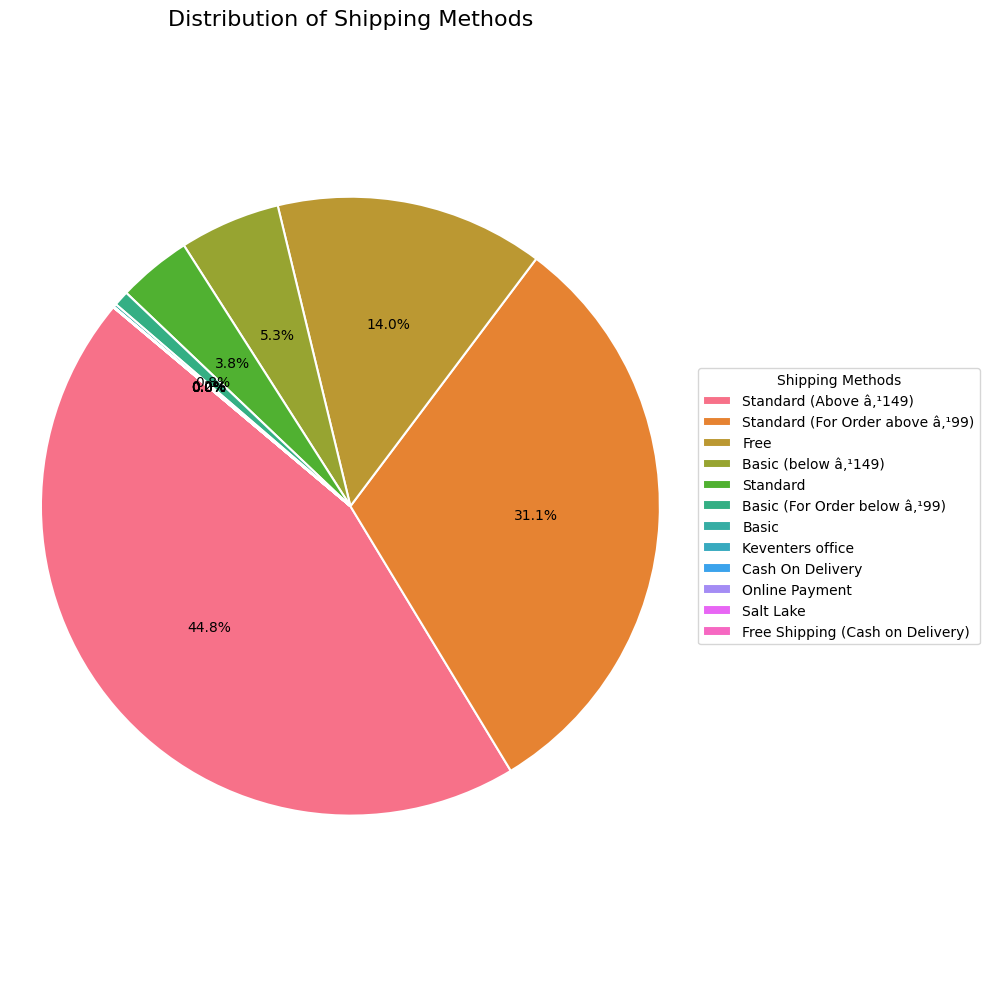

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
file_path = 'D.xlsx'
df_unique = pd.read_excel(file_path, sheet_name='unique')
if 'df_unique' in locals() and 'Shipping Method' in df_unique.columns:
    shipping_counts = df_unique['Shipping Method'].value_counts()


    colors = sns.color_palette('husl', len(shipping_counts))
    plt.figure(figsize=(10, 10))
    plt.pie(shipping_counts,
            labels=None,
            autopct='%1.1f%%',
            startangle=140,
            colors=colors,
            wedgeprops={'edgecolor': 'white', 'linewidth': 1.5})

    plt.title('Distribution of Shipping Methods', fontsize=16)
    plt.axis('equal')


    plt.legend(shipping_counts.index, title="Shipping Methods", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

    plt.tight_layout()
    plt.show()
    plt.savefig('shipping_method_distribution.jpg')
    from google.colab import files
    files.download('shipping_method_distribution.jpg')
else:
    print("Error: DataFrame 'df_unique' or 'Shipping method' column not found.")
    print("Please ensure the 'unique' sheet from 'D.xlsx' is loaded correctly and contains 'Shipping method'.")


/tmp/ipython-input-33-2763452215.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_refunds = df_new.groupby('Month')['Refunded Amount'].sum().reset_index()


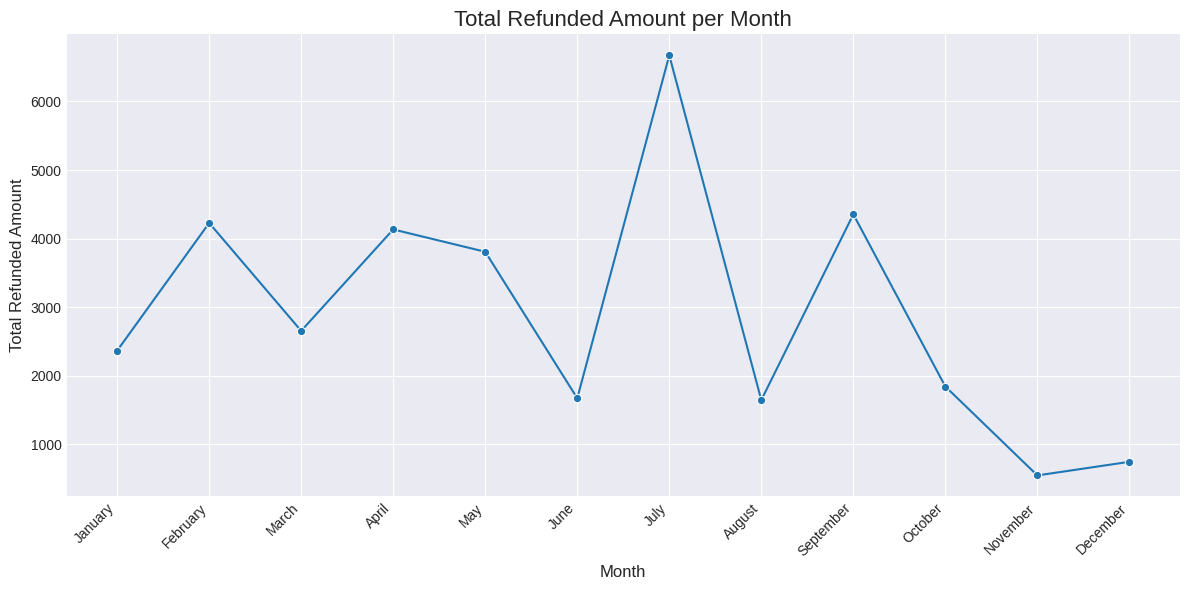

In [ ]:

if 'df_new' in locals() and 'Month' in df_new.columns and 'Refunded Amount' in df_new.columns:


    month_order = ['January', 'February', 'March', 'April', 'May', 'June',
                   'July', 'August', 'September', 'October', 'November', 'December']
    df_new['Month'] = pd.Categorical(df_new['Month'], categories=month_order, ordered=True)


    df_new['Refunded Amount'] = pd.to_numeric(df_new['Refunded Amount'], errors='coerce')


    df_new.dropna(subset=['Refunded Amount'], inplace=True)


    monthly_refunds = df_new.groupby('Month')['Refunded Amount'].sum().reset_index()


    monthly_refunds = monthly_refunds.sort_values(by='Month')


    plt.figure(figsize=(12, 6))
    sns.lineplot(x='Month', y='Refunded Amount', data=monthly_refunds, marker='o')

    plt.title('Total Refunded Amount per Month', fontsize=16)
    plt.xlabel('Month', fontsize=12)
    plt.ylabel('Total Refunded Amount', fontsize=12)
    plt.xticks(rotation=45, ha='right')

    plt.tight_layout()
    plt.show()

else:
    print("Error: DataFrame 'df_new' or necessary columns ('Month', 'Refunded Amount') not found.")
    print("Please ensure the 'new' sheet from 'D.xlsx' is loaded correctly and contains these columns.")
    print("Also, check that the column containing refunded amounts is named 'Refunded Amount'.")

/tmp/ipython-input-7-2170531079.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=average_orders_per_hour.index, y=average_orders_per_hour.values, palette='viridis')


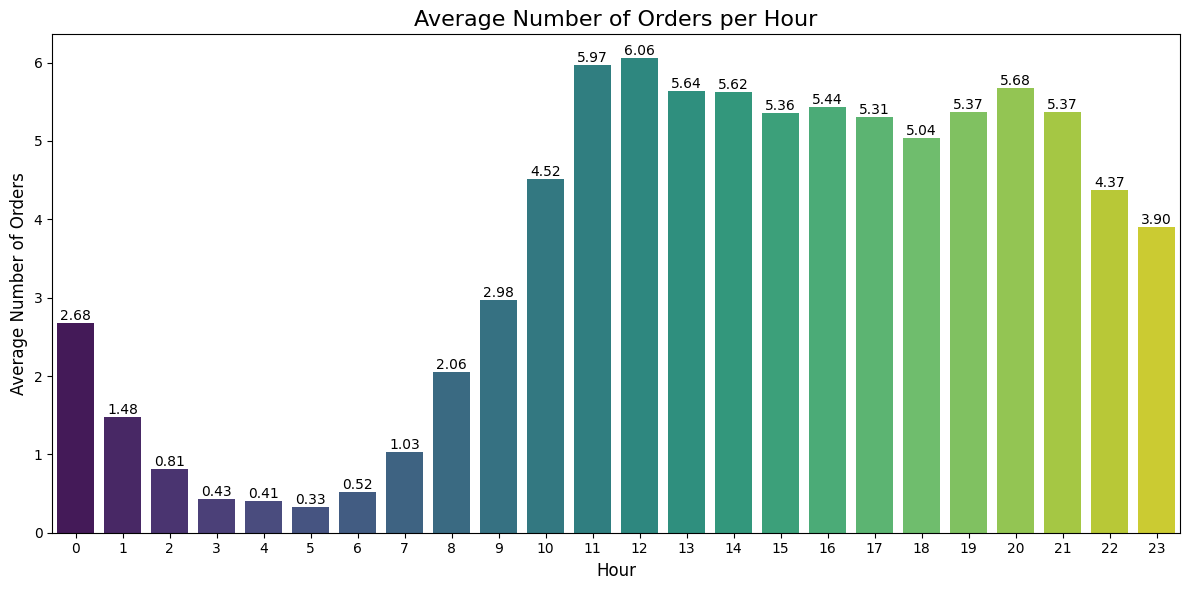

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
file_path = 'D.xlsx'
df_new = pd.read_excel(file_path, sheet_name='new')

if 'df_new' in locals() and 'Day' in df_new.columns and 'Month' in df_new.columns and 'Hour' in df_new.columns:


    df_new['Day_Identifier'] = df_new['Month'].astype(str) + '_' + df_new['Day'].astype(str)


    num_unique_days = df_new['Day_Identifier'].nunique()

    if num_unique_days > 0:

        order_count_per_hour = df_new.groupby('Hour').size()


        average_orders_per_hour = order_count_per_hour / num_unique_days


        average_orders_per_hour = average_orders_per_hour.sort_index()


        plt.figure(figsize=(12, 6))
        ax = sns.barplot(x=average_orders_per_hour.index, y=average_orders_per_hour.values, palette='viridis')

        plt.title('Average Number of Orders per Hour', fontsize=16)
        plt.xlabel('Hour', fontsize=12)
        plt.ylabel('Average Number of Orders', fontsize=12)
        plt.xticks(rotation=0)


        for container in ax.containers:
            ax.bar_label(container, fmt='%.2f', label_type='edge')

        plt.tight_layout()
        plt.show()
    else:
        print("Error: No unique days found in the data to calculate average.")

else:
    print("Error: DataFrame 'df_new' or necessary columns ('Day', 'Month', 'Hour') not found.")
    print("Please ensure the 'new' sheet from 'D.xlsx' is loaded correctly and contains these columns.")
    print("Also, make sure the DataFrame is named 'df_new'.")

In [ ]:


plt.savefig('Average_Orders_per_Hour.png')
files.download('Average_Orders_per_Hour.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

In [ ]:

if 'df_original' not in locals() or df_original.empty:
    file_path = 'orders_export_1 (45)(in).csv'
    try:
        df_original = pd.read_csv(file_path)
        print("Loaded df_original from CSV.")
    except FileNotFoundError:
        print(f"Error: File not found at {file_path}")
        df_original = pd.DataFrame()
    except Exception as e:
        print(f"An error occurred while loading the CSV: {e}")
        df_original = pd.DataFrame()


if not df_original.empty and 'Name' in df_original.columns and 'Lineitem name' in df_original.columns:


    df_items = df_original[['Name', 'Lineitem name']].copy()

    one_hot_pivot = df_items.pivot_table(index='Name', columns='Lineitem name', aggfunc='size', fill_value=0)

    one_hot_binary = (one_hot_pivot > 0).astype(int)


    one_hot_encoded_df = one_hot_binary.reset_index()


    ordered_names = df_original['Name'].unique()


    name_order_map = {name: i for i, name in enumerate(ordered_names)}

    one_hot_encoded_df['order'] = one_hot_encoded_df['Name'].map(name_order_map)


    one_hot_encoded_df = one_hot_encoded_df.sort_values(by='order')


    one_hot_encoded_df = one_hot_encoded_df.drop(columns=['order'])


    print("One-Hot Encoded Dataset:")
    print(one_hot_encoded_df.head())
    print(f"\nShape of the one-hot encoded dataset: {one_hot_encoded_df.shape}")
    print(f"Number of unique items: {len(one_hot_encoded_df.columns) - 1}") # Exclude the 'Name' column


    output_filename = 'one_hot_encoded_items_per_name.csv'
    one_hot_encoded_df.to_csv(output_filename, index=False)
    print(f"\nSaving and downloading '{output_filename}'...")
    files.download(output_filename)
    print(f"'{output_filename}' has been downloaded.")

else:
    print("Could not proceed with one-hot encoding. Ensure 'df_original' is loaded and contains 'Name' and 'Lineitem name' columns.")

One-Hot Encoded Dataset:
Lineitem name    Name  3 Mishti Doi + 3 Mango Lassi  3 Pack of Lassi  \
10090          #19174                             0                0   
10089          #19173                             0                0   
10088          #19172                             0                0   
10087          #19171                             0                0   
10086          #19170                             0                0   

Lineitem name  3 Tok Doi 80ml  6 Mishti Doi + 1 Paneer 200g  \
10090                       0                             0   
10089                       0                             0   
10088                       0                             0   
10087                       0                             0   
10086                       0                             0   

Lineitem name  6 Mishti Doi + 6 Mango Lassi  6 Pack Lassi  6 Tok Doi 80ml  \
10090                                     0             0               0   
10089    

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'one_hot_encoded_items_per_name.csv' has been downloaded.


In [ ]:
!pip install apyori

from apyori import apriori

if 'one_hot_encoded_df' in locals() and not one_hot_encoded_df.empty:

    transactions = []

    for index, row in one_hot_encoded_df.iterrows():

        items_in_transaction = row[row == 1].index.tolist()

        items_in_transaction = [item for item in items_in_transaction if item != 'Name']
        if items_in_transaction:
            transactions.append(items_in_transaction)

    if not transactions:
        print("No transactions found after processing the one-hot encoded data.")
    else:
        print(f"Prepared {len(transactions)} transactions for analysis.")

        rules = apriori(transactions,
                        min_support=0.001,
                        min_confidence=0.2,
                        min_lift=3,
                        min_length=2)

        results = list(rules)

        print("\nFound Association Rules:")
        if not results:
            print("No rules found with the given parameters. Try adjusting min_support, min_confidence, or min_lift.")
        else:

            for item in results:

                pair = item[0]
                items = [x for x in pair]


                support = item[1]


                rules_list = item[2]

                for rule in rules_list:

                    antecedent = list(rule[0])

                    consequent = list(rule[1])

                    confidence = rule[2]

                    lift = rule[3]

                    print(f"Rule: {antecedent} -> {consequent}")
                    print(f"  Support: {support:.4f}")
                    print(f"  Confidence: {confidence:.4f}")
                    print(f"  Lift: {lift:.4f}")
                    print("-" * 30)

else:
    print("Error: 'one_hot_encoded_df' DataFrame not found or is empty.")
    print("Please ensure the preceding code to create 'one_hot_encoded_df' ran successfully.")

Prepared 18173 transactions for analysis.

Found Association Rules:
Rule: ['Bailley Water - 1L (Pack of 12)'] -> ['Bailley Water - 500ml (Pack of 24)']
  Support: 0.0059
  Confidence: 0.3077
  Lift: 8.1157
------------------------------
Rule: ['Keventer Cheese & Corn Bite - 400 gms'] -> ['Keventer Mozzarella Cheese Stick - 300 gms']
  Support: 0.0013
  Confidence: 0.2323
  Lift: 17.0242
------------------------------
Rule: ['Keventer Chicken Breakfast Sausages - 250 gms'] -> ['Keventer Chicken Salami Plain - 250 gms']
  Support: 0.0020
  Confidence: 0.3304
  Lift: 48.0286
------------------------------
Rule: ['Keventer Chicken Salami Plain - 250 gms'] -> ['Keventer Chicken Breakfast Sausages - 250 gms']
  Support: 0.0020
  Confidence: 0.2960
  Lift: 48.0286
------------------------------
Rule: ['Keventer Chicken Finger - 400 gms'] -> ['Keventer Chicken Nuggets - 400 gms']
  Support: 0.0013
  Confidence: 0.2017
  Lift: 12.7705
------------------------------
Rule: ['Keventer Chicken Pop 

In [ ]:
rule_data = []
if 'results' in locals() and results:
    for item in results:
        pair = item[0]
        support = item[1]
        rules_list = item[2]

        for rule in rules_list:
            antecedent = list(rule[0])
            consequent = list(rule[1])
            confidence = rule[2]
            lift = rule[3]

            rule_data.append({
                'Antecedent': ', '.join(antecedent),
                'Consequent': ', '.join(consequent),
                'Support': support,
                'Confidence': confidence,
                'Lift': lift
            })


    rules_df = pd.DataFrame(rule_data)


    output_filename = 'association_rules.csv'
    rules_df.to_csv(output_filename, index=False)

    print(f"\nAssociation rules saved to '{output_filename}'.")

    files.download(output_filename)
    print(f"'{output_filename}' has been downloaded.")

elif 'results' in locals() and not results:
    print("No rules were found by the Apriori algorithm, so nothing to save.")
else:
    print("Apriori results ('results' variable) not found. Please run the preceding cell to generate the rules.")


Association rules saved to 'association_rules.csv'.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'association_rules.csv' has been downloaded.
